<a href="https://colab.research.google.com/github/mkmoridani/gitrepo/blob/main/IFT6390_Lab1_02_1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A little theory on kNN / Un peu de théorie sur k-PPV

## Intuition / Intuition

The algorithm $k$ Nearest Neighbours is one of the simpler machine learning algorithms. It is motivated by the idea that similar examples $x_t$ should have similar targets $y_t$.

So, to predict the target class of a test examples $x$, all we need to do is find the $k$ nearest neighbours to $x$ using some metric - for example, euclidean distance also known as $L_2$ norm, or more generally minkowski distance $L_p$.

In a classification problem, we use those $k$ nearest neighbours to predict the target class of $x$ as the most common target of its neighbours i.e. it's as though each neighbour of $x$ casts a vote for their own target class and the class with the most votes wins.

<hr/>

L'algorithme des $k$ plus proches voisins ($k$-PPV) est certainement un des algorithmes les plus simples d'apprentissage automatique. Il est motivé par l'idée que des *entrées* $x_t$ semblables devraient avoir des *cibles* $y_t$ semblables. Ainsi, pour bien définir un algorithme $k$-PPV, il suffit de définir ce que veut dire *semblable* dans le contexte des entrées et de définir l'influence de ces voisins sur la prédiction de la cible pour une entrée de test.

Donc, pour obtenir une prédiction de la cible pour une entrée de test $x$, il suffit de trouver les k plus proches voisins selon une métrique déterminant jusqu'à quel point des entrées sont semblables (par exemple, la distance euclédienne ou norme $L^2$, ou de façon plus générale la norme $L^p$ de Minkowski) et d'utiliser ces $k$ plus proches voisins pour prédire la cible de $x$. 

Dans un problème de classification, la prédiction correspond à la classe majoritaire parmi les $k$ plus proches voisins, i.e. que l'ensemble des $k$ plus proches voisins votent pour la classe correspondant à leur cible respective et la classe recueillant le plus de vote est choisie en tant que prédiction par l'algorithme.

## Mathematic Formalism / Formalisation mathématique

Let

* $x$ be test examples
* $m$ be the number of classes
* $D_n = \{(x_i,y_i)\}_{i=1}^n$ be the training data where $y_i \in Y=\{1,\dots,m\}$ is the corresponding target class of example $x_i$
* $d(\dot{},\dot{})$ be our distance metric
* $V(x, k)$ is the set of $k$ nearest neighbours of $x$

<br/>

The prediction by the $k$-NN algorithm is therefore:

> $$f(x)={\mbox{arg max}} \left(\frac{1}{k} \sum_{(x_i,y_i) \in V(x, k)} \mathrm{onehot}_{m}(y_i)\right)$$


To find out the $k$ nearest neighbours, we need to calculate some "distance" between the test sample $x$ and all the samples in the training set, and pick the $k$ samples with the least distance from $x$.
 
A common distance function is the euclidean distance function:
> $$d(a,b)= \sqrt{\sum_{i=1}^{dim}(a_i-b_i)^2}$$

which is a specific case of the $L_p$ norm of Minkowski (where $p = 2$)
> $$d(a,b)= \left(\sum_{i=1}^d|a_i-b_i|^p\right)^\frac{1}{p}$$

<hr/>

Soit

* $x$ une entrée de test
* $m$ le nombre de classes
* $D_n = \{(x_i,y_i)\}_{t=1}^n$ l'ensemble d'entraînement, où $y_i \in Y=\{1,\dots,m\}$ correspond à l'identité de la classe cible de l'entrée $x_i$
* $d(\dot{},\dot{})$ une fonction de distance
* $V(x,k)$ l'ensemble des $k$ plus proches voisins de $x$

<br/>

La prédiction par l'algorithme des k plus proches voisins est donc:

> $$f(x)={\mbox{arg max}} \left(\frac{1}{k} \sum_{(x_i,y_i) \in V(x, k)} \mathrm{onehot}_{m}(y_i)\right)$$

Afin de déterminer les $k$ plus proches voisins, nous avons besoin de calculer une certaine métrique de distance entre les points test $x$ et les points du jeu d'entraînement. Nous déterminons ensuite les $k$ plus proches points du point text $x$.

Une fonction communément utilisée est celle de la distance euclidenne:
> $$d(a,b)= \sqrt{\sum_{i=1}^{dim}(a_i-b_i)^2}$$

qui est un cas spécifique de la norme $L^p$ de Minkowski(où $p = 2$)
> $$d(a,b)= \left(\sum_{i=1}^d|a_i-b_i|^p\right)^\frac{1}{p}$$

## Pseudocode

We define a machine learning algorithm by specifying its training procedure for some training data and how to predict the target for a test example. Given that the training procedure for $k$-NN is simply loading the training data $D_n$, we can specify how to predict the target class for the case when $k = 1$:

    def kNN_1(x):
        min = +inf # intialize the distance of the nearest neighbour
        idx = -1 # initialize the index of the nearest neighbour
        
        for i=1 to n:
            dt = d(X[i], x)
            if dt < min
                min = dt
                idx = i
                
        return Y[idx]

This runs in $O(n(k+d))$ time but you can get $O(n(log(k)+d))$ time by using a priority queue (heap)

<hr/>

On définit un algorithme d'apprentissage en précisant sa procédure d'entraînement et de prédiction pour une nouvelle entrée de test. Étant donné que la procédure d'entraînement de l'algorithme $k$-PPV consiste simplement à mettre en mémoire l'ensemble d'entraînement $D_n$, voici donc la procédure de prédiction:

    def k-PPV(x):
        min = +inf # initialiser la distance du plus proche voisin
        idx = -1 # initialiser l'index du plus proche voisin
        
        for i=1 to n:
            dt = d(X[i], x)
            if dt < min
                min = dt
                idx = i
                
        return Y[idx]
        
Cette procédure de prédiction s'exécute en temps $O(n(k+d))$. Il est cependant possible d'obtenir un temps d'exécution dans $O(n(log(k)+d))$, en utilisant une queue de priorité (monceau).

# Putting it in practice! / Mise en pratique!

## Introduction

We want to make a machine learning algorithm to identify flowers. We have three types of iris species and we will try to use the characteristics of each flower (features) to determine which species of iris it is (class). But you don't know anything about flowers! So we will learn this algorithm using a dataset of flower measurements and the classes those flowers correspond to (training data), and we will use 1-kNN!

<hr/>

On vous demande de concevoir un algorithme d'apprentissage permettant d'identifier des fleurs. Il s'agit de trois variétés d'iris. C'est à partir de ces caractéristiques (traits) que vous devez déterminer la sorte de chaque fleur (la classe). Vous ne connaissez rien aux fleurs! Fort heureusement vous disposez d'un ensemble d'entraînement associant à divers exemples de mesures d'iris la bonne variété (classe). Armé de l'algo 1-PPV et de Python vous foncez tête baissée.

## 1. Calculate the $L^p$ (Minkowski) distance between two vectors / Calculez la distance $L^p$ (Minkowski) entre deux vecteurs

We want a function that given two vectors (`np.array`) will output the Minkowski distance between them. Complete the function `minkowski_vec` below. Test it yourself on two vectors (you can import the iris dataset as we did in the tutorial to use real iris vectors).

### ***Ex: Calculate Minkowski distance between two vectors***. Here is the [definition](http://en.wikipedia.org/wiki/Minkowski_distance) in case you need it

<hr/>

Nou voulons définir une fonction qui en prenant 2 vecteurs retournera la distance Minkowski entre les deux. Completez la fonction `minkowski_vec` ci-dessous. Testez la fonction sur deux vecteurs (vous pouvez importez  le dataset iris et créez 2 vecteurs afin d'effectuer le test).

### ***Ex: Calculez la distance Minkowski entre deux vecteurs***. Voici la définition, au besoin : [definition](http://en.wikipedia.org/wiki/Minkowski_distance)

In [1]:
import numpy as np
def minkowski_vec(x1, x2, p=2.0):
    dist = np.sum(np.abs(x1-x2)**p)**(1/p)
    
    return dist

# for testing
a = np.ones((4,))
b = np.zeros((4,))
print(minkowski_vec(a, b))
print(minkowski_vec(a, a))

2.0
0.0


**Note:** since this is a vector, we'll need to apply operations to the different dimensions. We could do this by iterating over the array one element at a time (e.g. here to calculate the difference in absolute values)

    s = 0
    for i in range(x1.shape[0]):
        s = s + abs(x1[i] - x2[i])

or we could use `numpy` intelligently to do the same thing:

    s = np.sum(np.abs(x1 - x2))

the difference is that the second option is not just more compact and easy to read, it uses `numpy`'s library to calculate the sums and operations which is much much faster than Python because they are specialized math functions written in C++. 

In short, use numpy functions instead of for loops where possible!

<hr/>


**Note:** on peut calculer cette distance en itérant sur chaque composante de x1 et x2, et en calculant la somme après, ou on peut profiter du fait que la plupart (ou même toutes) des opérations mathématiques (abs, +, -, \*\* etc.) sur des structures de données itérables (listes, vecteurs/matrices) produisent des résultats équivalents à l'application d'une boucle for, mais en beaucoup moins de temps (on parle des langages interprétés comme Python). Par exemple, on peut calculer la somme de la différence des valeurs absolues de x1 et x2 comme suit:

    s = 0
    for i in range(x1.shape[0]):
        s = s + abs(x1[i] - x2[i])

ou on peut simplement utiliser `numpy` de manière intelligente comme suit:

    s = numpy.sum(numpy.abs(x1 - x2))

En plus d'être plus compacte, la deuxième option est beaucoup plus rapide (parce qu'elle fait appel à une implémentation efficace de sum et abs en C++).

En résumé, utilisez les fonctions numpy à la place de boucle `for` le plus possible!

## 2. Calculate $L^p$ distance between a vector and a matrix / Calculer une distance $L^p$ entre un vecteur et une matrice

We also need a function to compare one flower to a bunch of other flowers. We will modify the function `minkowski_mat` to calculate an $L_p$ distance between a single vector (or 1D `np.array`) and a matrix (or 2D `np.array`). This function should return an array of distances corresponding to the distance between the single flower $x1$ and each other flower in the bunch represented as rows in $X2$.  Use `np.newaxis` or broadcasting rules.

### ***Ex: Calculate Minkowski distance between a vector and a matrix***

<hr/>


Il nous faut aussi une fonction qui va nous permettre de comparer une fleur avec tout un ensemble de fleurs, sur la base de leurs traits. On va maintenant modifier la fonction `minkowski_mat` pour calculer une *distance* $L^p$ entre un vecteur et une matrice, c.a.d. une fonction qui va nous retourner un vecteur de distances $L^p$ entre une fleur $x1$ et toutes les autres fleurs représentées par les lignes de la matrice $X2$. Utilisez `np.newaxis`.

### ***Ex: Calculez la distance Minkowski entre un vecteur et une matrice***

In [4]:
def minkowski_mat(x1, X2, p=2.0):
    dist = np.sum((np.abs(X2-x1)**p),axis=1)**(1/p)
    
    return dist

# for testing
a = np.ones((4,))
b = np.random.randint(5, size=(10,4))
print(minkowski_mat(a,b))

[2.64575131 5.29150262 4.35889894 3.60555128 4.47213595 1.73205081
 3.87298335 3.46410162 3.60555128 3.46410162]


Reiterating the very important point **the vast majority of vector-vector, vector-matrix, or matrix-matrix operations are going to be much more efficient in numpy than in python using a for loop**. 

You may have noticed that the difference in the efficient example implementations of `minkowski_vec` and `minkowski_mat` is just the part: `axis=1`. This exercise is to understand why it is important (and necessary) to specify on which axis you are applying the sum.

<hr/>


Encore une fois, une chose importante à retenir: **la  grande majorité des opérations vecteur-vecteur, vecteur-matrice ou bien matrice-matrice seront beaucoup plus efficaces en utilisant les opérateurs numpy au lieu d'une boucle for.**
 
Vous avez peut-être remarqué que la différence entre les implémentations efficaces de `minkowski_vec` et `minkowski_mat` est seulement la partie: `axis=1`. L'exercice est de comprendre pourquoi il est nécessaire de spécifier sur quel *axe* on va faire la somme.

## 3. 1-KNN / 1-PPV

We're nearly there!

### ***Ex: Finish the following function to predict the species of a test data point with features `x`:***
- From `data`, slice the `features` and `target`
- Calculate the distance between `x` and the `features` using `minkowski_mat`
- Find the data point with the least distance, and return its `target`

<hr/>

Nous y sommes presque!

### ***Ex: Complétez la fonction suivante afin de prédire l'espèce d'un point test avec ses traits `x` :***
- À partir de `data`, découpez les `features` et les `target`
- Calculez la distance entre les features `x` et les données d'entraînement en utilisant `minkowski_mat`
- Trouvez le point de donnée avec la distance minimale et retournez sa classe `target`


In [5]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  iris = np.loadtxt('http://www.iro.umontreal.ca/~dift3395/files/iris.txt')
else:
  iris = np.loadtxt('iris.txt')

In [16]:
def knn(x, data, p=2): 
    features=data[:,:-1]
    target=data[:,-1]
    d=minkowski_mat(x,features,p)

    return target[np.argmin(d)]


In [17]:
a = np.ones((4,))
knn(a, iris,p=2)

1.0

Note that `x` is the array of features (no target) of the test example. This functions should be quite easy to write then because `minkowski_mat` will output an array of distances, and we want to find the *index* of the *minimum* of those distances, then just find the target at that index.

<hr/>

À noter ici que `x` est le vecteur de caractéristiques (sans étiquette) de l'exemple de test. Ayant en mains la fonction `minkowski_mat`, les choses devraient être simples, car cette fonction retournera un vecteur/liste de distances. Il faut ensuite trouver l'exemple/la fleur qui est la plus *proche* (dans le sens de minkowski) de `x` et ainsi, on va conclure que l'étiquette (prédite) de `x` est celle de cet exemple.

## Conclusion / Conclusion

We now have all the components of the 1-NN algorithm, all that's left is to put it all together and test it

Remember that we can access the functions we've executed in the previous cells

After testing your implementation, write a `for` loop which will call `knn(iris[i,:-1], iris, p)` for each example `i` and compare the prediction to the true target `iris[i,-1]`. The two should always be the same, why?

<hr/>

Nous avons maintenant en notre possession toutes les composantes de l'algorithme 1-PPV. Il reste simplement à en faire l'assemblage et à tester le tout. 

Rappelez-vous que les fonctions définies dans les cellules de code précédentes sont accessibles dans toutes les cellules subséquentes une fois les précédentes exécutées.

Afin de tester votre implémentation, écrivez une boucle `for` qui appelle, pour chaque exemple `i`, la fonction `ppv(iris[i,:-1],iris,p)` et qui compare la classe prédite avec `iris[i,-1]` (la vrai étiquette). Les deux devraient toujours être les mêmes (pourquoi?).

In [19]:
import numpy as np
#iris = np.loadtxt('iris.txt')

predictions = np.zeros(iris.shape[0])
for i in range(iris.shape[0]):
    predictions[i] = knn(iris[i,:-1],iris)
    
targets = iris[:,-1]
print("error rate:",(1.0-(predictions==targets).mean())*100.0)

error rate: 0.0


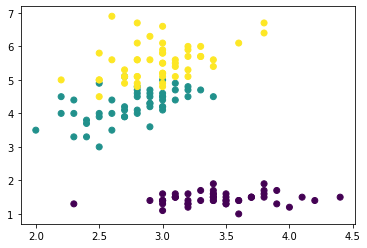

In [20]:
import matplotlib.pyplot as plt
plt.scatter(iris[:,1], iris[:,2], c=iris[:,-1])

## Bonus and things to reflect on for the next time / Bonus et trucs auxquels réfléchir pour la prochaine fois

In machine learning, we usually have a split of training data and testing data
* divide the dataset in two : one training dataset with 50 examples (randomly sampled) and a testing dataset with the remaining examples. 
* Using the training data to find the nearest neighbours and target output for a given example, calculate the performance of your algorithm on training and testing. Why is there such a difference? 

<hr/>

En apprentissage machine, nous divisons habituellement un jeu de données en un jeu d'entraînement et un jeu de données test
* divisez l'ensemble iris en deux - un ensemble d'entraînement qui contient 50 exemples (un sous-ensemble aléatoire!) et un ensemble de test qui contient le reste.
* utilisez le premier sous-ensemble comme données sur lesquelles on va calculer les distances minkowski (donc données d'entraînement).Calculez la performance de votre algorithme sur les deux ensembles. Pourquoi y a-t-il une telle différence? 

In [ ]:
indexes = np.arange(iris.shape[0])
# set the random seed so we have exact reproducibility
np.random.seed(3395)
np.random.shuffle(indexes)

train_set = iris[indexes[:50]]
test_set = iris[indexes[50:]]

# predictions on the training set
train_predictions = np.zeros(train_set.shape[0])
for i in range(train_set.shape[0]):
    train_predictions[i] = knn(train_set[i,:-1],train_set)
    
# predictions on the testing set
test_predictions = np.zeros(test_set.shape[0])
for i in range(test_set.shape[0]):
    test_predictions[i] = knn(test_set[i,:-1],train_set)
    
print("Training data error rate", (1.0-(train_predictions==train_set[:,-1]).mean())*100.0)
print("Testing data error rate", (1.0-(test_predictions==test_set[:,-1]).mean())*100.0)